<img src='graphics/text_eda.jpeg'>

<img src='graphics/spacer.png'>

<center><font style="font-size:40px;">Text Exploratory Data Analysis (EDA), Part 1 </font></center>
<center>Prepared and coded by Ben P. Meredith, Ed.D.</center>

In the last meet-up, we worked on cleaning the data we scraped from Indeed. We also saved the clean text to a DataFrame. In this meet-up, we are going to use this clean data and begin doing some text analysis,
1. Count word frequency using two different methods (not the only two, but we will cover only two)
1. Discover and remove stop words
1. Find and remove duplicates
1. Plot a word cloud as an initial analysis



<p> 
</p>

<font style="font-size:24px;">Text EDA Introduction</font>

As with any other data, text data requires an EDA (Exploratory Data Analysis). Keeping in mind that we are working on a job scraper and that our goal is to find jobs that might fit our needs (plus determine the magic words that employers are using in their announcements, and which we want to use in our resumes), we will focus our EDA on those items. 

We will first work through different EDA scenarios, adding further information to our DataFrame in the process. At the end of our EDA, however, we will bring each of these techniques together into our program so our EDA on future job scrapings will automatically run through an EDA for us. 

# Load our Libraries and Data

In the next block, write the code to load the csv file saved from our last meet-up without having to copy and paste it to the new folder. Put it under the variable "df". Then display the head and shape of the DataFrame.

In [25]:
import pandas as pd

df = pd.read_csv('/Users/benmeredith/Desktop/Python Meet-up/018_Cleaning_Text/data/data_scientist_job_search.csv', 
                 index_col = 0)

display(df.head())
display(df.shape)

,job_id,title,company,url,text,pull_date,clean_text,token_text
0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,About Pinterest:Millions of people across the ...,"['About', 'Pinterest', ':', 'Millions', 'of', ..."
1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...","['-', 'MS', 'or', 'PhD', 'degree', 'in', 'comp..."
2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,"['-', 'PhD', 'or', 'equivalent', 'Master', ""'s..."
3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...","['At', 'Equiscript', ',', 'we', 'improve', 'ac..."
4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,"['-', 'Programming', 'experience', 'with', 'at..."


(116, 8)

# Text EDA
## Exercise: Word Count per Advertisement

Are employers mounting large or small advertisements? Determining how many words are in each advertisement will be our first task. 

Let's start with writing a function that counts the number of words for any given text. You will want to
>1. iterate through each clean_text in the DataFrame
>1. count the number of words
>1. return that count to a column called 'word_count' in the DataFrame in each appropriate row

###  `.split( )` and `len( )` method
In the next block, using the `.split()` and `.len()` commands, write a function that counts the words in a text. 

In [26]:
#Count TOTAL words in a document given the document text as a string and returning the count as an integer

def count_words(text):
    text = str(text) #insure the text is a string - it may not always be a string
    text = text.split(' ')# Split based upon spaces
    count = len(text) #the length of the string equals the count of words
    return count

Using the function that you just built, 
1. write out the code to iterate through the `clean_text` in your DataFrame, 
1. count the words in each observation, 
1. then place that count in a new column called `word_count`. 
1. Finally, print out the head of the DataFrame so we see the results. 

This will give us more prepared data to analyze. 


In [27]:
for index, text in enumerate(df['clean_text']):
#     print(text, '\n\n', '*'*72, '\n\n')# Just a fancy output to insure we are working properly - get rid of it later
    count = count_words(str(text))# used the function above to count the number of words
    df.loc[index, 'word_count'] = count # Assign that count value to the DataFrame
    
df.head()

,job_id,title,company,url,text,pull_date,clean_text,token_text,word_count
0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,About Pinterest:Millions of people across the ...,"['About', 'Pinterest', ':', 'Millions', 'of', ...",239.0
1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...","['-', 'MS', 'or', 'PhD', 'degree', 'in', 'comp...",319.0
2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,"['-', 'PhD', 'or', 'equivalent', 'Master', ""'s...",382.0
3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...","['At', 'Equiscript', ',', 'we', 'improve', 'ac...",1208.0
4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,"['-', 'Programming', 'experience', 'with', 'at...",304.0


## Count Word Frequency

The frequency of words as they appear in a string/corpus _may_ tell us something about the importance of that word in the overall document, or advertisement in our case here. As with most of Python's methods, there are more than one way to count the frequency of words within a string (and there are more than two that we will see in a moment). 

### Method 1: A StackOverflow Long Function

StackOverflow [https://stackoverflow.com] is one of a coder's most frequently used tools. It is a treasure trove of useful information and code. But sometimes, it can render some interesting results that need to be examined more closely. This is the case with the first example of a method to count the frequency of words in a corpus/string. 

Method 1 of counting the frequency of words in a corpus comes to us from StackOverflow. It was an answer that received a high score for other coder's agreeing to it. So let's look at it and see what it is doing. 

In [28]:
# Count the FREQUENCY of words in a document text given as a string and returning the frequency

def count_word_frequency(text):
    import re # we will need to regex library to find words alone

    frequency = {} #establish a dictionary to store the word as key and count as value

    text_string = str(text).lower()#ensure the string to count is in fact a string and lower case
    match_pattern = re.findall(r'\b[a-z]{1,15}\b', text_string)# regex to find words alone and store it in match_pattern

    for word in match_pattern:# loop to count each word
        count = frequency.get(word,0)#use the frequency dictionary to capture get each word and its count
        frequency[word] = count + 1# adds 1 to the count because computer start numbering at zero

    frequency = sorted(frequency.items(), key=lambda item: item[1], reverse=True)#sort from most to least frequent

    return frequency

### Method 2: `Counter` function

Impressive as Method 1 is with all that it does, let's take a look at a second option - one that I wrote as a counter-example. 

In [29]:
def count_frequency_of_words(text):
    from collections import Counter # import the Counter function from the collections library
    text = str(text) #force python to recognize the text as a string in case it isn't
    word_frequency = Counter(text.split(' '))# use the split command to split by spaces
    word_frequency = sorted(word_frequency.items(), key=lambda item: item[1], reverse=True)# Sort from most to least frequent
    return word_frequency

### Exercise: Count Word Frequency in each Advertisement using Method 1

Let's now use Method 1 to count the word frequency in each advertisement and save the results to our DataFrame for each advertisement. Then we will look at a single observation to get an idea of the results. 

In [30]:
#Method 1 

for index, text in enumerate(df['clean_text']):
    count = count_word_frequency(str(text))
    df.loc[index, 'word_count_frequency'] = [count]
    
df.head()

,job_id,title,company,url,text,pull_date,clean_text,token_text,word_count,word_count_frequency
0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,About Pinterest:Millions of people across the ...,"['About', 'Pinterest', ':', 'Millions', 'of', ...",239.0,"[(and, 12), (the, 10), (to, 9), (pinterest, 5)..."
1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...","['-', 'MS', 'or', 'PhD', 'degree', 'in', 'comp...",319.0,"[(and, 17), (with, 12), (in, 8), (of, 7), (the..."
2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,"['-', 'PhD', 'or', 'equivalent', 'Master', ""'s...",382.0,"[(and, 27), (of, 10), (with, 10), (to, 9), (th..."
3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...","['At', 'Equiscript', ',', 'we', 'improve', 'ac...",1208.0,"[(and, 83), (the, 62), (data, 42), (of, 35), (..."
4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,"['-', 'Programming', 'experience', 'with', 'at...",304.0,"[(to, 13), (and, 11), (experience, 9), (with, ..."


In [31]:
# Let's check an entry to see what it looks like

df.loc[42, 'word_count_frequency']    


[('and', 14),
 ('of', 10),
 ('or', 8),
 ('experience', 7),
 ('in', 7),
 ('to', 6),
 ('the', 6),
 ('models', 5),
 ('a', 5),
 ('nlu', 4),
 ('team', 4),
 ('technology', 4),
 ('with', 4),
 ('data', 4),
 ('years', 3),
 ('related', 3),
 ('for', 3),
 ('business', 3),
 ('alexa', 3),
 ('language', 3),
 ('new', 3),
 ('our', 3),
 ('product', 3),
 ('help', 3),
 ('word', 3),
 ('s', 2),
 ('degree', 2),
 ('ml', 2),
 ('field', 2),
 ('building', 2),
 ('machine', 2),
 ('learning', 2),
 ('application', 2),
 ('natural', 2),
 ('interpretations', 2),
 ('more', 2),
 ('teams', 2),
 ('build', 2),
 ('their', 2),
 ('using', 2),
 ('is', 2),
 ('technical', 2),
 ('software', 2),
 ('scientists', 2),
 ('as', 2),
 ('scientist', 2),
 ('you', 2),
 ('will', 2),
 ('company', 2),
 ('other', 2),
 ('modeling', 2),
 ('engineering', 2),
 ('processing', 2),
 ('nlp', 2),
 ('text', 2),
 ('semantic', 2),
 ('similarity', 2),
 ('an', 2),
 ('phd', 1),
 ('equivalent', 1),
 ('master', 1),
 ('plus', 1),
 ('cs', 1),
 ('ce', 1),
 ('progra

### Exercise: Count Word Frequency in each Advertisement using Method 2

Now let's use Method 2 to count the word frequency in each advertisement and save the results to the DataFrame. Then we will print out the results of the same observation we just used so we can compare the results. 

In [32]:
#Method 2 for counting word frequency

for index, text in enumerate(df['clean_text']):
    count = count_frequency_of_words(text)
    df.loc[index, 'word_count_frequency'] = [count]
    
df.head()

,job_id,title,company,url,text,pull_date,clean_text,token_text,word_count,word_count_frequency
0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,About Pinterest:Millions of people across the ...,"['About', 'Pinterest', ':', 'Millions', 'of', ...",239.0,"[(and, 12), (the, 10), (to, 9), (-, 9), (in, 5..."
1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...","['-', 'MS', 'or', 'PhD', 'degree', 'in', 'comp...",319.0,"[(and, 16), (with, 12), (in, 8), (of, 7), (the..."
2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,"['-', 'PhD', 'or', 'equivalent', 'Master', ""'s...",382.0,"[(and, 27), (-, 13), (of, 9), (with, 9), (to, ..."
3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...","['At', 'Equiscript', ',', 'we', 'improve', 'ac...",1208.0,"[(and, 81), (-, 58), (the, 53), (of, 35), (to,..."
4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,"['-', 'Programming', 'experience', 'with', 'at...",304.0,"[(to, 13), (-, 11), (and, 11), (with, 9), (in,..."


In [33]:
# Let's check an entry to see what it looks like

df.loc[42, 'word_count_frequency']    


[('-', 19),
 ('and', 14),
 ('of', 10),
 ('or', 8),
 ('in', 7),
 ('', 6),
 ('to', 6),
 ('the', 6),
 ('/', 6),
 ('a', 5),
 ('experience', 4),
 ('models', 4),
 ('technology', 4),
 ('with', 4),
 ('data', 4),
 ('years', 3),
 ('related', 3),
 ('for', 3),
 ('business', 3),
 ('Experience', 3),
 ('team', 3),
 ('new', 3),
 ('NLU', 3),
 ('word', 3),
 ('ML', 2),
 ('field', 2),
 ('building', 2),
 ('machine', 2),
 ('learning', 2),
 ('application', 2),
 ('Alexa', 2),
 ('Natural', 2),
 ('Language', 2),
 ('Interpretations', 2),
 ('more', 2),
 ('build', 2),
 ('their', 2),
 ('using', 2),
 ('is', 2),
 ('product', 2),
 ('technical', 2),
 ('software', 2),
 ('will', 2),
 ('help', 2),
 ('our', 2),
 ('text', 2),
 ('semantic', 2),
 ('similarity,', 2),
 ('an', 2),
 ('PhD', 1),
 ('equivalent', 1),
 ("Master's", 1),
 ('Degree', 1),
 ('plus', 1),
 ('4+', 1),
 ('CS,', 1),
 ('CE,', 1),
 ('2+', 1),
 ('programming', 1),
 ('Java,', 1),
 ('C++,', 1),
 ('Python', 1),
 ('languageThe', 1),
 ('Understanding', 1),
 ('(NLU)', 

### Exercise: Count frequency of all words in the dataset using Method 1

In the prior two examinations, we looked at the frequency of words in each advertisement. But what are the most frequent words used in all advertisements? Knowing the most frequently used words used in our job search can help us to develop a better resume (one that passes the initial sorting algorithyms and gets our resume into the hands of a human). Knowing the most frequently used words for our search position can also help us identify the key skills for which employers (in general) are seeking in candidates. 

Let's use both methods again to compare results.

In [34]:
#Method 1

all_text = '' #Establish an empty string variable to hold all of the text

for text in df['clean_text']:#grab the text in each advertisement
    text = str(text)# make each text a string (just an insurance policy)
    all_text = all_text + text #Concatenate each string into one long string

count = count_word_frequency(all_text)#Use Method 1 to count word frequency


print(count)

[('and', 3546), ('to', 2071), ('the', 1799), ('of', 1484), ('in', 1216), ('with', 990), ('a', 973), ('data', 895), ('experience', 789), ('or', 689), ('for', 665), ('our', 554), ('you', 500), ('we', 472), ('on', 444), ('as', 435), ('learning', 418), ('is', 417), ('business', 401), ('that', 331), ('machine', 301), ('at', 300), ('team', 299), ('an', 292), ('s', 290), ('will', 280), ('science', 279), ('their', 275), ('work', 274), ('are', 244), ('years', 241), ('skills', 228), ('amp', 212), ('analytics', 209), ('be', 206), ('design', 205), ('by', 199), ('deloitte', 192), ('amazon', 185), ('ability', 184), ('from', 180), ('this', 178), ('development', 177), ('solutions', 171), ('analysis', 166), ('models', 165), ('strong', 165), ('large', 157), ('help', 156), ('ml', 155), ('new', 152), ('teams', 152), ('people', 150), ('develop', 150), ('ai', 150), ('your', 147), ('customer', 146), ('such', 146), ('working', 142), ('computer', 141), ('field', 139), ('engineering', 139), ('have', 138), ('abo

### Exercise: Count frequency of all words in the dataset using Method 2

Now let's use Method 2 to do the same thing and compare our results. Once again, we will see that the results are slightly different. 

In [35]:
# Method 2

all_text = '' #Establish an empty string variable to hold all of the text

for text in df['clean_text']:#grab the text in each advertisement
    text = str(text)# make each text a string (just an insurance policy)
    all_text = all_text + text #Concatenate each string into one long string

count = count_frequency_of_words(all_text)#Use Method 2 to count word frequency


print(count)

[('and', 3437), ('-', 2378), ('to', 1964), ('the', 1569), ('of', 1463), ('in', 1162), ('with', 977), ('a', 896), ('for', 642), ('or', 586), ('data', 575), ('our', 491), ('is', 412), ('experience', 402), ('business', 375), ('as', 367), ('on', 348), ('that', 327), ('Experience', 326), ('at', 279), ('their', 275), ('will', 272), ('an', 265), ('you', 240), ('We', 231), ('are', 228), ('learning', 220), ('years', 214), ('team', 211), ('machine', 208), ('work', 205), ('by', 192), ('&amp;', 187), ('be', 179), ('we', 173), ('/', 154), ('development', 153), ('help', 151), ('new', 149), ('skills', 146), ('people', 141), ('such', 138), ('from', 135), ('Data', 131), ('your', 128), ('solutions', 128), ('models', 127), ('have', 127), ('about', 123), ('large', 123), ('Strong', 117), ('You', 116), ('teams', 115), ('building', 115), ('technical', 115), ('working', 113), ('Amazon', 113), ('AI', 112), ('ML', 110), ('more', 108), ('one', 107), ('Deloitte', 102), ('other', 101), ('opportunities', 101), ('ma

## Removing Stop Words

If you take a look at our word count frequency, what words do you notice are the most frequent? "a", "and", "to", "in", and so forth. The little prepositions and conjunctions that are common in English are not in what we are interested. These small words, which do not add anything, are called, "Stop Words" in natural language processing. 

I intentionally did not talk about Stop Words before this, just so we could see how they clutter and dirty our data. While we will be getting rid of Stop Words in the next few blocks, we would normally get rid of them once we cleaned the data - in some, but not all cases. 

After looking at the list of stopwords that I have in the next block of code, can we think of cases where we would NOT want to remove stopwords?

>__Note__: NLTK has an internal library of stopwords, which we did not talk about. While it is convenient to simply import that library's stopwords, it is not a large or complete library. The method we are using here allows you to determine what stopwords you want to use in each case. For example, as we are working with job advertisements, there are a plethora of cliche words that we may find which do not add anything to the value of the advertisement that we want to eliminate in our analysis. 

In [36]:
#Remove Stopwords given the document text as a string and returning filtered text

def remove_stopwords(text):
    stopword_list = ('to', 
                     'a', 
                     'and', 
                     'an', 
                     'the', 
                     'of', 
                     'in', 
                     'with', 
                     'or', 
                     'at', 
                     'or', 
                     'is', 
                     'p',
                     'for',
                     '-',
                    )
    tokens = text.split(' ')#Tokenizing the words
    tokens = [token.strip() for token in tokens]#Stripping out leading and trailing whitespace from each word
    tokens = [str(token).lower() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

### Exercise: Removing Stop Words and Storing New Text

In the next block, using the `remove_stopwords` function that we just built, 
1. Iterate through the entire DataFrame's `clean_text`
1. Remove the stop words
1. Store the text in a new column called `no_stop_text`
1. display the DataFrame head to see our work. 

In [37]:
for index, text in enumerate(df['clean_text']):
    df.loc[index, 'no_stop_text'] = remove_stopwords(text)
    
df.head()

,job_id,title,company,url,text,pull_date,clean_text,token_text,word_count,word_count_frequency,no_stop_text
0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,About Pinterest:Millions of people across the ...,"['About', 'Pinterest', ':', 'Millions', 'of', ...",239.0,"[(and, 12), (the, 10), (to, 9), (-, 9), (in, 5...",about pinterest:millions people across world c...
1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...","['-', 'MS', 'or', 'PhD', 'degree', 'in', 'comp...",319.0,"[(and, 16), (with, 12), (in, 8), (of, 7), (the...","ms phd degree computer science, operations re..."
2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,"['-', 'PhD', 'or', 'equivalent', 'Master', ""'s...",382.0,"[(and, 27), (-, 13), (of, 9), (with, 9), (to, ...",phd equivalent master's degree plus 4+ years ...
3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...","['At', 'Equiscript', ',', 'we', 'improve', 'ac...",1208.0,"[(and, 81), (-, 58), (the, 53), (of, 35), (to,...","equiscript, we improve access healthcare commu..."
4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,"['-', 'Programming', 'experience', 'with', 'at...",304.0,"[(to, 13), (-, 11), (and, 11), (with, 9), (in,...",programming experience least one modern langu...


In [38]:
df.loc[42, 'no_stop_text']

"puget sound energy looking grow our community like-minded, top talented individuals like you! our rapidly growing, award winning energy efficiency programs, our pathway exciting innovative future now.pse's financial planning &amp; analysis team looking qualified candidates fill open senior data analyst position!job descriptionpuget sound energy’s business initiatives team looking senior data analyst join our team. business initiatives team plays critical role performing quantitative qualitative analysis support resource acquisition decisions company’s energy supply portfolio. this position exciting opportunity help shape pse’s clean energy future. senior data analyst will lead initiatives design build reporting requirements, information dashboards other end-user information portals resources.upholds safety compliance standards inherent pse’s operating and/or field procedures related work responsibilities. promotes supports culture total safety.job responsibilities integrates complex d

### Exercise: Word Count Frequency without Stop Words

Let's run our word_count_frequency function again, but this time, let's use the text without stopwords. 

In [39]:
for index, text in enumerate(df['no_stop_text']):
    count = count_word_frequency(str(text))
    df.loc[index, 'word_count_frequency'] = [count]
    
df.head()

,job_id,title,company,url,text,pull_date,clean_text,token_text,word_count,word_count_frequency,no_stop_text
0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,About Pinterest:Millions of people across the ...,"['About', 'Pinterest', ':', 'Millions', 'of', ...",239.0,"[(pinterest, 5), (their, 4), (new, 3), (our, 3...",about pinterest:millions people across world c...
1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...","['-', 'MS', 'or', 'PhD', 'degree', 'in', 'comp...",319.0,"[(experience, 5), (learning, 5), (you, 5), (wi...","ms phd degree computer science, operations re..."
2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,"['-', 'PhD', 'or', 'equivalent', 'Master', ""'s...",382.0,"[(business, 7), (experience, 6), (you, 6), (so...",phd equivalent master's degree plus 4+ years ...
3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...","['At', 'Equiscript', ',', 'we', 'improve', 'ac...",1208.0,"[(data, 42), (business, 15), (company, 15), (e...","equiscript, we improve access healthcare commu..."
4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,"['-', 'Programming', 'experience', 'with', 'at...",304.0,"[(experience, 9), (learning, 5), (as, 4), (hel...",programming experience least one modern langu...


## Find and Remove Duplicate Job Announcements

Duplicate data will throw off results of analyses. Having more than one copy of the same job announcement will throw off not only our analysis, but it will throw off our applications for jobs. So let's tell Python to look at every entry (row) and eliminate duplicates. 

There are several ways to do this, but the simplest (and fastest) is to use the `.drop_duplicates()` function built into Pandas. As we see in Line 2 below, we are setting our parameters to look for the same `job_id` and when Python finds two duplicate `job_id`s, to keep the first one. 

In [40]:
def remove_duplicates(df):
    df = df.drop_duplicates(subset='job_id', keep='first') 
    df = df.reset_index()
    return df

### Exercise: Remove Duplicates

In the next block, write out the code to use the `remove_duplicates(df)` function above, then display the tail of the DataFrame to see our work. 

In [41]:
df = remove_duplicates(df)

df.tail()

,index,job_id,title,company,url,text,pull_date,clean_text,token_text,word_count,word_count_frequency,no_stop_text
60,111,jl_fa1fe3575ef75d4b,C++ Software Engineer - Autonomous Vehicle A.I...,TuSimple,https://www.indeed.com/viewjob?jk=fa1fe3575ef7...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-06-14,"<h3 class=""jobSectionHeader"">This role is loca...","['<', 'h3', 'class=', ""''"", 'jobSectionHeader'...",433.0,"[(system, 13), (are, 6), (autonomous, 6), (cla...","<h3 class=""jobsectionheader"">this role located..."
61,112,jl_9522ae307d31afc4,"AI/ML - Software Engineer, Siri Authoring Tools",Apple,https://www.indeed.com/viewjob?jk=9522ae307d31...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-06-14,"SummaryPosted: Jun 11, 2020Weekly Hours: 40Rol...","['SummaryPosted', ':', 'Jun', '11', ',', '2020...",441.0,"[(systems, 8), (you, 8), (siri, 8), (that, 8),...","summaryposted: jun 11, 2020weekly hours: 40rol..."
62,113,jl_12e31b3b1c1a3668,Senior AI Engineer,Harebrained Schemes,https://www.indeed.com/viewjob?jk=12e31b3b1c1a...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-06-14,Harebrained Schemes is looking for a Senior AI...,"['Harebrained', 'Schemes', 'is', 'looking', 'f...",673.0,"[(you, 18), (as, 10), (ai, 9), (are, 9), (work...",harebrained schemes looking senior ai engineer...
63,114,jl_37768e3c300e0ad2,Principal Statistician,"Seattle Genetics, Inc.",https://www.indeed.com/viewjob?jk=37768e3c300e...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-06-14,Summary:Provide statistical/strategic inputs t...,"['Summary', ':', 'Provide', 'statistical/strat...",514.0,"[(clinical, 11), (statistical, 8), (provide, 7...",summary:provide statistical/strategic inputs c...
64,115,jl_c598121ff7201e59,Data & AI Specialist,Microsoft,https://www.indeed.com/viewjob?jk=c598121ff720...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-06-14,People can do remarkable things when technolog...,"['People', 'can', 'do', 'remarkable', 'things'...",801.0,"[(microsoft, 12), (education, 11), (you, 9), (...",people can do remarkable things when technolog...


In [42]:
df.shape

(65, 12)

## Word Cloud EDA 

### On no_stop_text

Now that we have duplicate entries removed, we have stopwords removed from our cleaned text, AND we have all of this stored in our dataset, we are ready to do some analysis of the text. 

Just to compare the cleaned text and the text with stopwords removed - we want to see if there is a visual difference in the text's show of word counts - let's make a WordCloud for four entries looking at the clean text and at the text without stopwords. Do we see a difference in the meanings that come out of the two texts?

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
%matplotlib inline

In [44]:
def show_wordcloud(data, title = None):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    stopwords = set(STOPWORDS)
    %matplotlib inline
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=50, 
        scale=12,
        random_state=42
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

Senior Data Scientist new


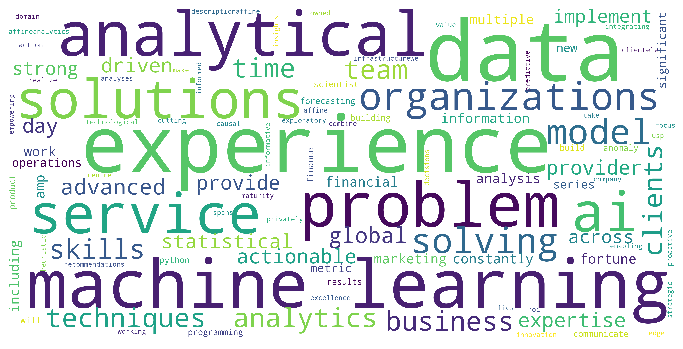

Games Markets Quantitative Analyst Internship new


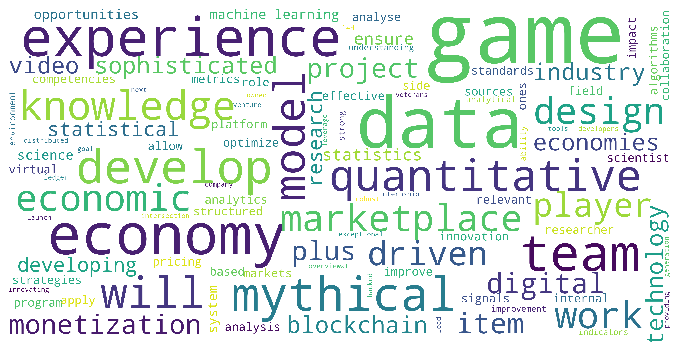

Data Scientist Avalara


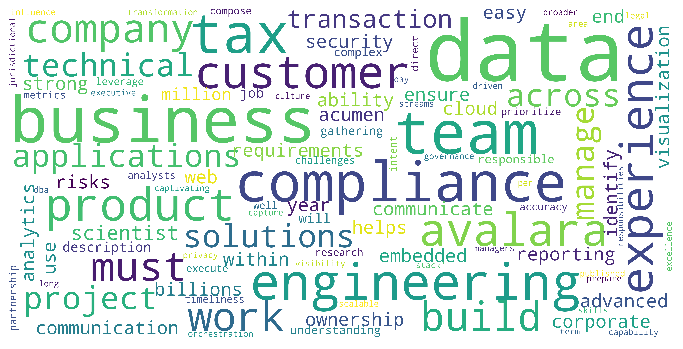

Lead Data Scientist - Deep Learning The Climate Corporation


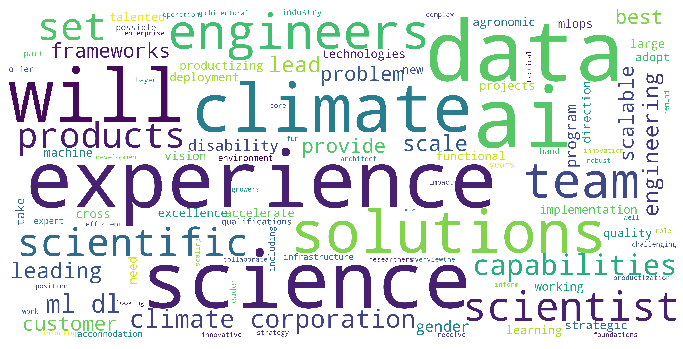

In [45]:
for index in range(30, 34): # just pulling a random four announcements as an example
    print(df.loc[index, 'title'], df.loc[index, 'company'])
    show_wordcloud(df.loc[index, 'no_stop_text'])

### And on the clean text of the same job announcements

Senior Data Scientist new


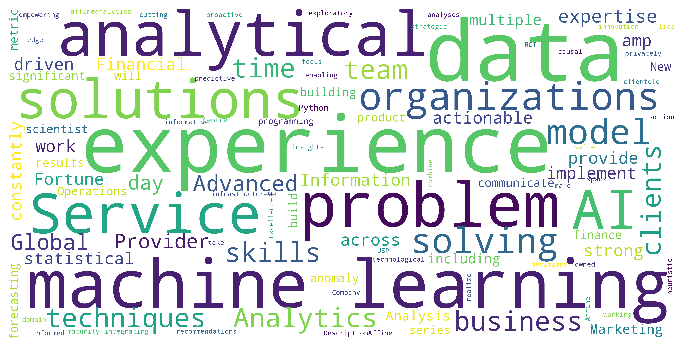

Games Markets Quantitative Analyst Internship new


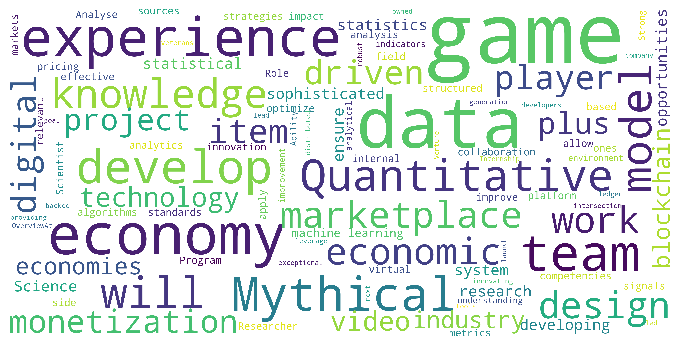

Data Scientist Avalara


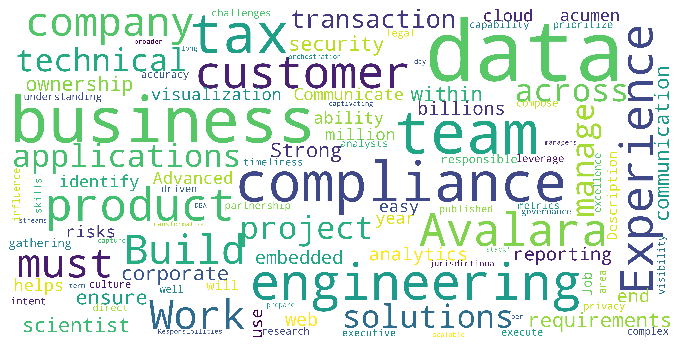

Lead Data Scientist - Deep Learning The Climate Corporation


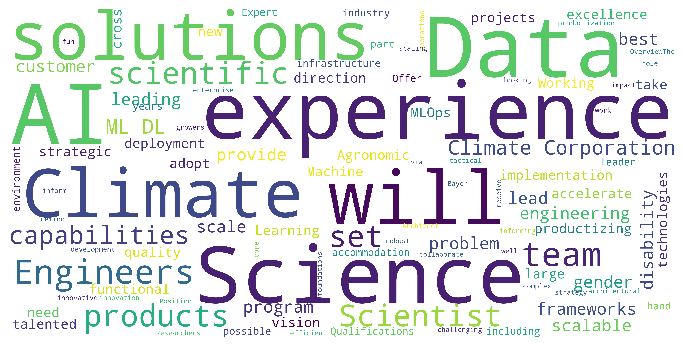

In [46]:
for index in range(30, 34):# pulling four random samples as an example
    print(df.loc[index, 'title'], df.loc[index, 'company'])
    show_wordcloud(df.loc[index, 'clean_text'])

# Exercise: Saving Our Results

Let's write out the code to save our results for the next meet-up.

In [47]:
df.to_csv('data/data_scientist_job_search_processed.csv')